In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Warnings (Some imports gives unnecessary imports that, this import is to ignore that)
import warnings
warnings.filterwarnings('ignore')

# For displaying all columns and rows (optional, for better debugging)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [6]:
df = pd.read_csv("../Weather.csv - Dataset.csv")

In [7]:
print("Shape:", df.shape)
df.info()

Shape: (145460, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am 

In [8]:
print("Shape:", df.shape)

Shape: (145460, 24)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,@dropdown
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,0.0
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,NaN


In [11]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing_values)

Missing values per column:
 @dropdown        145460
Sunshine          69835
Evaporation       62790
Cloud3pm          59358
Cloud9am          55888
Pressure9am       15065
Pressure3pm       15028
WindDir9am        10566
WindGustDir       10326
WindGustSpeed     10263
Humidity3pm        4507
WindDir3pm         4228
Temp3pm            3609
Rainfall           3261
RainToday          3261
RainTomorrow       3253
WindSpeed3pm       3062
Humidity9am        2654
WindSpeed9am       1767
Temp9am            1767
MinTemp            1485
MaxTemp            1261
Location              0
Date                  0
dtype: int64


In [12]:
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage.round(2)
})
print(missing_df)

               Missing Values  Percentage
@dropdown              145460      100.00
Sunshine                69835       48.01
Evaporation             62790       43.17
Cloud3pm                59358       40.81
Cloud9am                55888       38.42
Pressure9am             15065       10.36
Pressure3pm             15028       10.33
WindDir9am              10566        7.26
WindGustDir             10326        7.10
WindGustSpeed           10263        7.06
Humidity3pm              4507        3.10
WindDir3pm               4228        2.91
Temp3pm                  3609        2.48
Rainfall                 3261        2.24
RainToday                3261        2.24
RainTomorrow             3253        2.24
WindSpeed3pm             3062        2.11
Humidity9am              2654        1.82
WindSpeed9am             1767        1.21
Temp9am                  1767        1.21
MinTemp                  1485        1.02
MaxTemp                  1261        0.87
Location                    0     

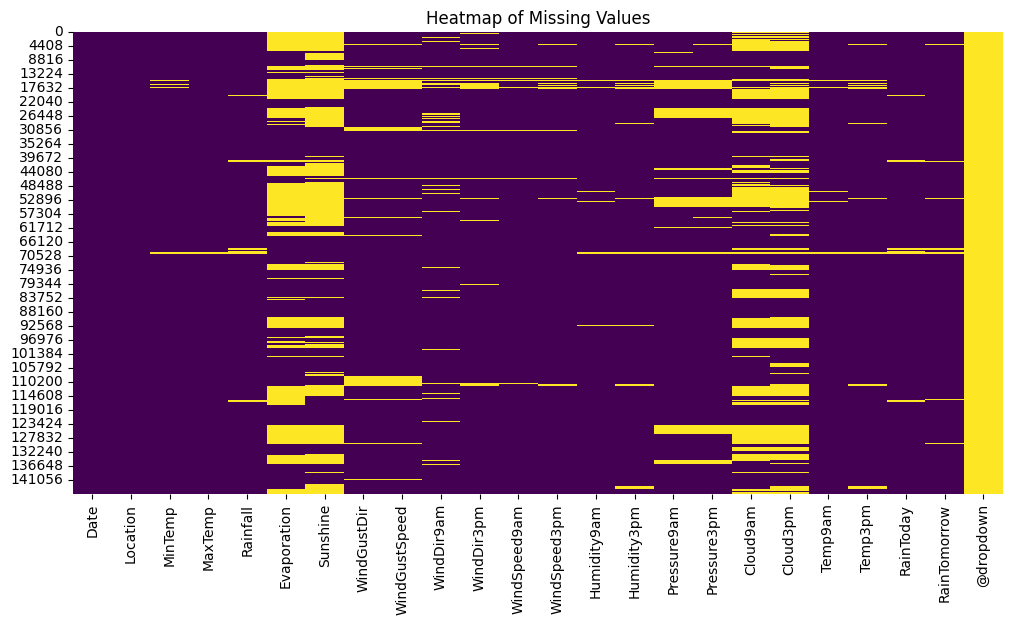

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [14]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:", cat_cols)

Categorical Columns: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [15]:
for col in cat_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts(dropna=False).head())


Value counts for Date:
 Date
2017-06-18    49
2017-06-19    49
2017-06-20    49
2017-06-21    49
2017-06-22    49
Name: count, dtype: int64

Value counts for Location:
 Location
Canberra    3436
Sydney      3344
Perth       3193
Adelaide    3193
Darwin      3193
Name: count, dtype: int64

Value counts for WindGustDir:
 WindGustDir
NaN    10326
W       9915
SE      9418
N       9313
SSE     9216
Name: count, dtype: int64

Value counts for WindDir9am:
 WindDir9am
N      11758
NaN    10566
SE      9287
E       9176
SSE     9112
Name: count, dtype: int64

Value counts for WindDir3pm:
 WindDir3pm
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
Name: count, dtype: int64

Value counts for RainToday:
 RainToday
No     110319
Yes     31880
NaN      3261
Name: count, dtype: int64

Value counts for RainTomorrow:
 RainTomorrow
No     110596
Yes     31611
NaN      3253
Name: count, dtype: int64


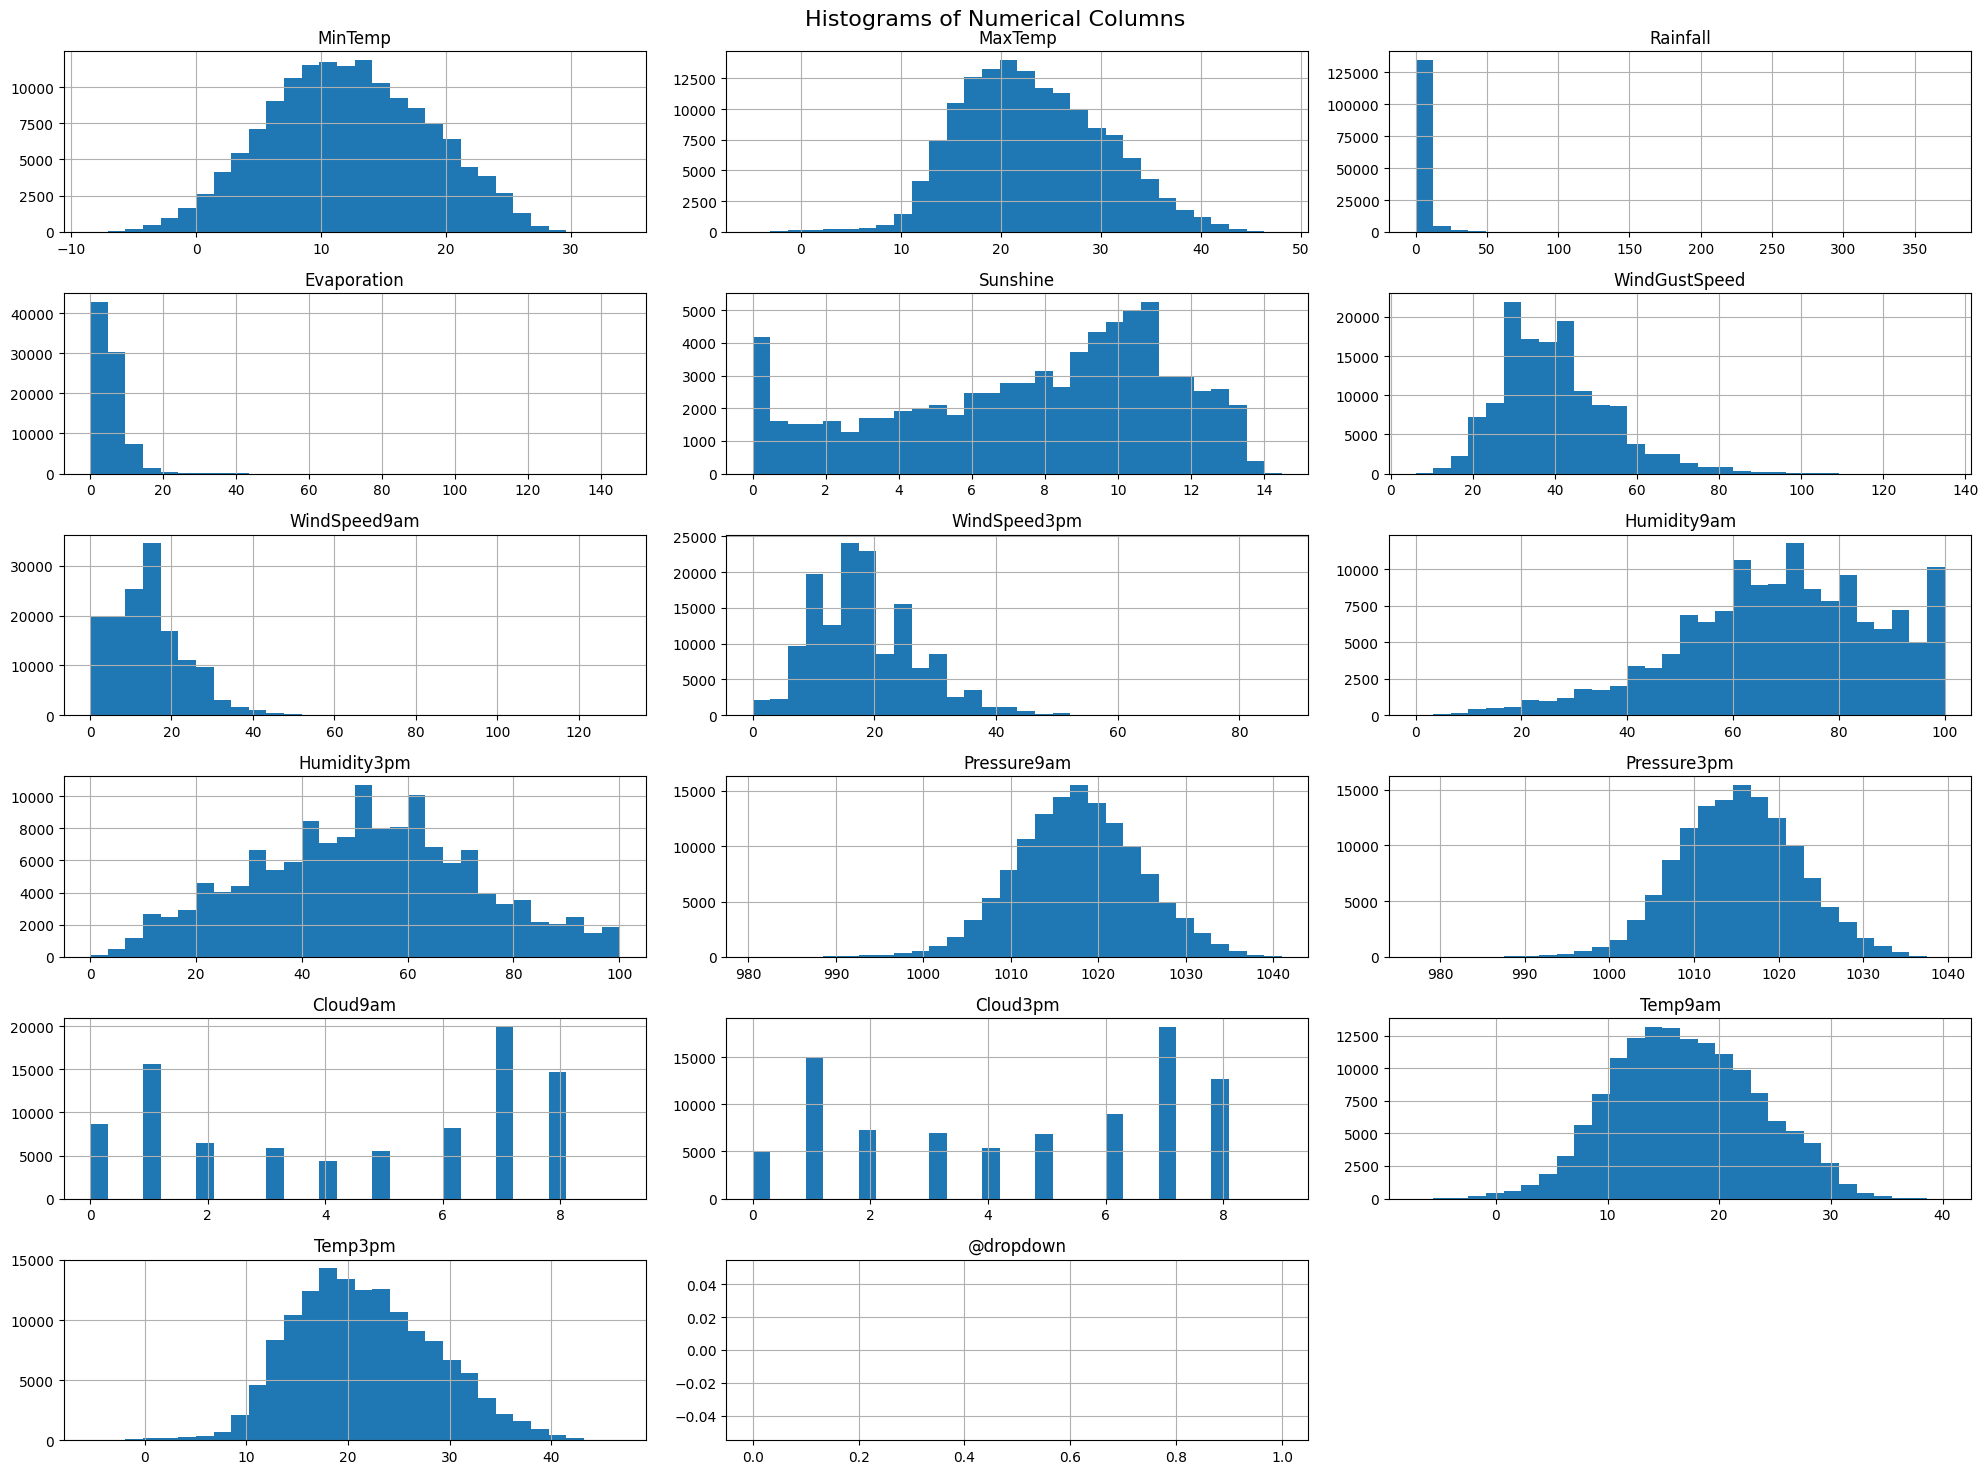

In [16]:
num_cols = df.select_dtypes(include='float64').columns.tolist()

df[num_cols].hist(bins=30, figsize=(20, 15), layout=(6, 3))
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.tight_layout()
plt.show()

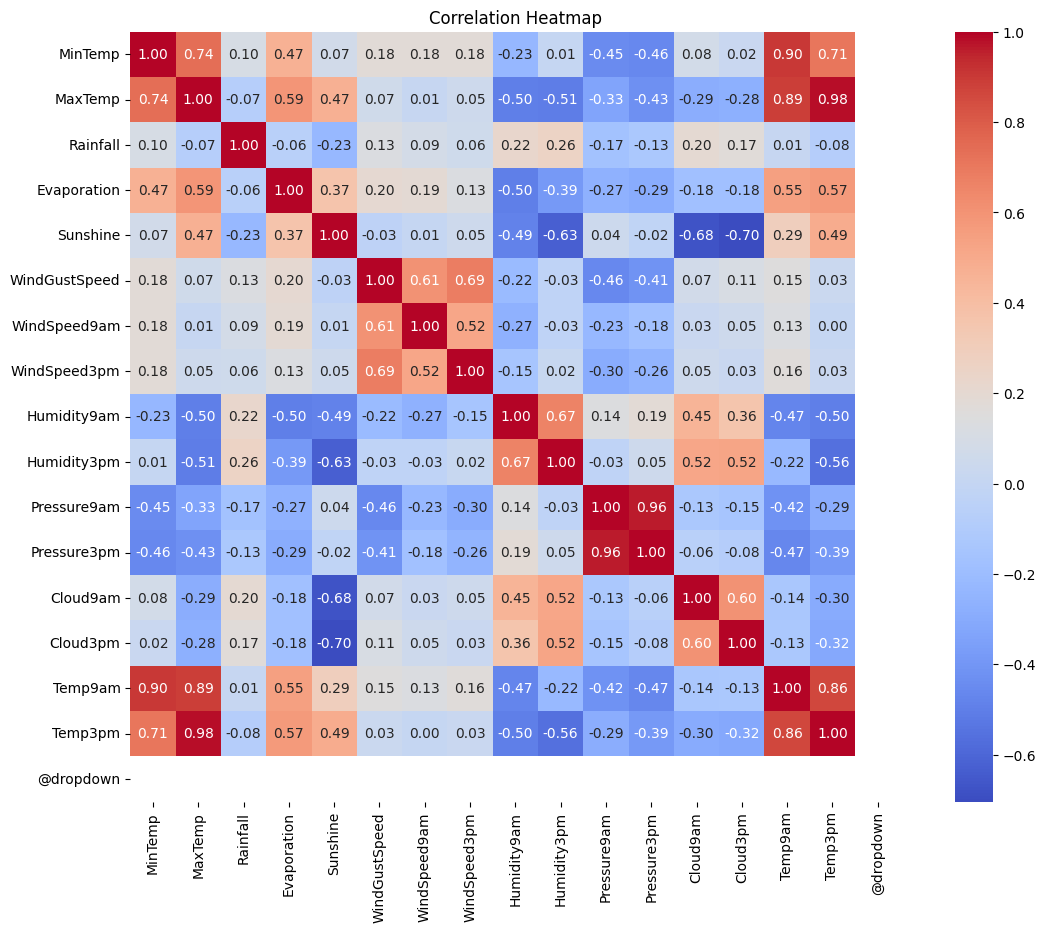

In [19]:
correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

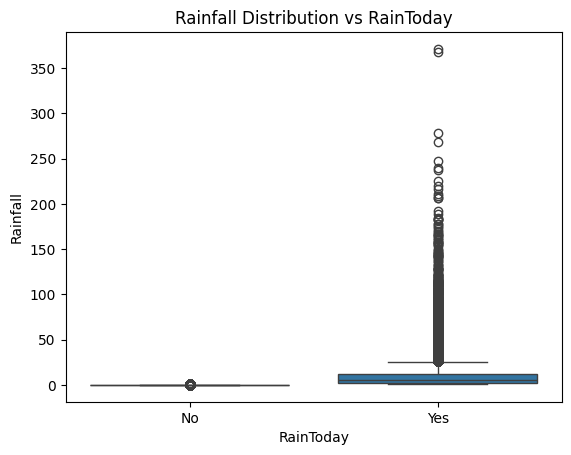

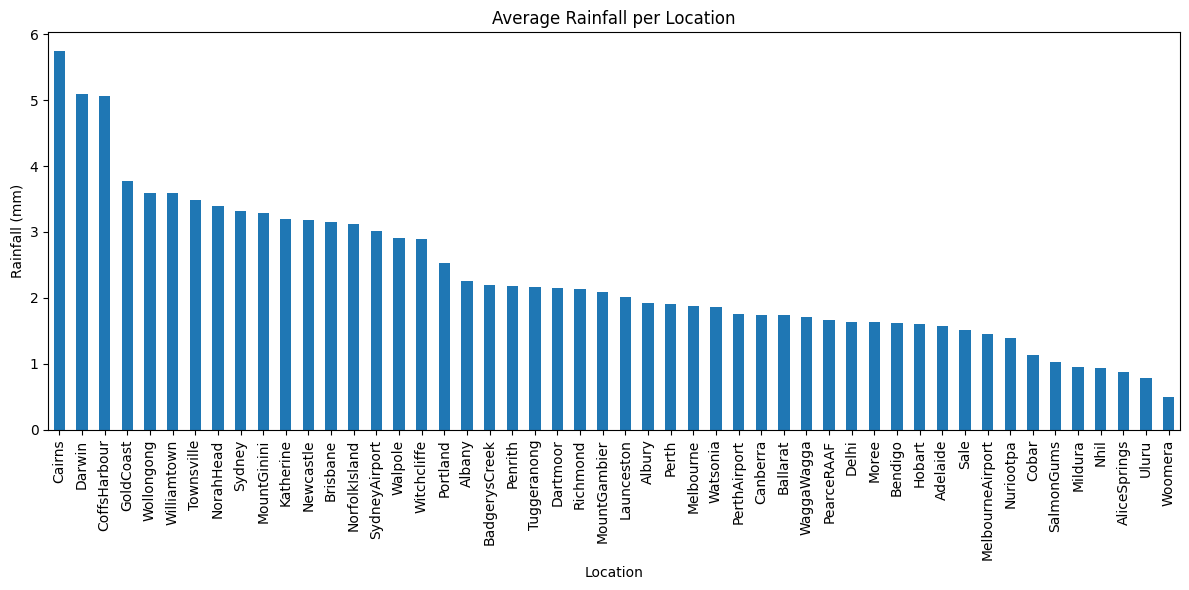

In [20]:
sns.boxplot(data=df, x='RainToday', y='Rainfall')
plt.title("Rainfall Distribution vs RainToday")
plt.show()

avg_rainfall_location = df.groupby('Location')['Rainfall'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
avg_rainfall_location.plot(kind='bar')
plt.title('Average Rainfall per Location')
plt.ylabel('Rainfall (mm)')
plt.tight_layout()
plt.show()

In [21]:
df.drop(columns=['@dropdown'], inplace=True)

In [22]:
df = df[df['RainTomorrow'].notnull()]

In [24]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [25]:
num_cols = df.select_dtypes(include='float64').columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

In [26]:
missing_after = df.isnull().sum()
print("Remaining Missing Values:\n", missing_after[missing_after > 0])

Remaining Missing Values:
 Series([], dtype: int64)
